In [3]:
# Step 1: Install required libraries (if not already installed)
!pip install datasets --quiet

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/jsonpointer-3.0.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330



Dataset Overview:
DatasetDict({
    train: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 250
    })
    validation: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 150
    })
})

Example from 'train' split:
Tokens:  ['MRR', ',', 'mortality', 'rate', 'ratio', ';', 'TBI', ',', 'traumatic', 'brain', 'injury', '.']
POS:     ['NOUN', 'PUNCT', 'NOUN', 'NOUN', 'NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'ADJ', 'NOUN', 'NOUN', 'PUNCT']
Tags:    ['B-AC', 'O', 'B-LF', 'I-LF', 'I-LF', 'O', 'B-AC', 'O', 'B-LF', 'I-LF', 'I-LF', 'O']

--- Random Samples ---

Sample 1
Tokens:  ['Conditional', 'logistic', 'regression', 'was', 'used', ',', 'adjusting', 'for', 'major', 'risk', 'factors', 'for', 'GDM', '.', 'After', 'adjusting', 'for', 'covariates', ',', 'individual', 'n-3', 'eicosapentaenoic', 'acid', '(', 'EPA', ')', ',', 'docosapentaenoic

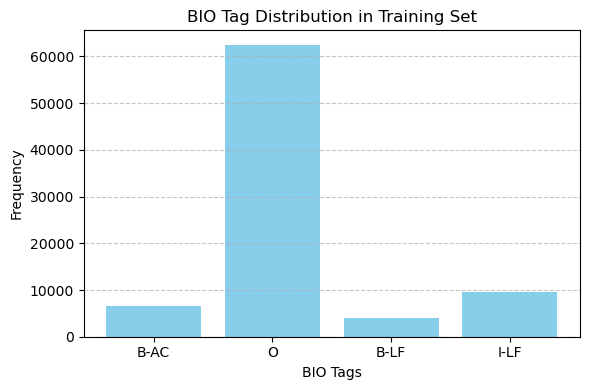


Average sentence length: 41.27 tokens


In [1]:
# Step 2: Import libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random

# Step 3: Load the PLOD-CW-25 dataset
dataset = load_dataset("surrey-nlp/PLOD-CW-25")

# Step 4: Print dataset structure
print("\nDataset Overview:")
print(dataset)

print("\nExample from 'train' split:")
example = dataset['train'][0]
print("Tokens: ", example['tokens'])
print("POS:    ", example['pos_tags'])
print("Tags:   ", example['ner_tags'])

# Step 5: Preview few random samples
print("\n--- Random Samples ---")
for i in range(3):
    sample = random.choice(dataset['train'])
    print(f"\nSample {i+1}")
    print("Tokens: ", sample['tokens'])
    print("POS:    ", sample['pos_tags'])
    print("Tags:   ", sample['ner_tags'])

# Step 6: Count label distribution
print("\nCalculating tag frequency across training set...")
all_tags = [tag for sample in dataset['train'] for tag in sample['ner_tags']]
tag_counts = Counter(all_tags)
print("\nTag counts:", tag_counts)

# Step 7: Visualize tag distribution
plt.figure(figsize=(6, 4))
plt.bar(tag_counts.keys(), tag_counts.values(), color='skyblue')
plt.title("BIO Tag Distribution in Training Set")
plt.xlabel("BIO Tags")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optional: Show average sentence length
token_lengths = [len(sample['tokens']) for sample in dataset['train']]
avg_length = sum(token_lengths) / len(token_lengths)
print(f"\nAverage sentence length: {avg_length:.2f} tokens")
